# minimal_tfidf_vector_2d_plot_with_pca

#### Recommended Starter Code:
```
$ python3 -m venv env; source env/bin/activate
$ python3 -m pip install --upgrade pip
$ python3 -m pip install pandas numpy nltk scikit-learn matplotlib jupyter
```


In [1]:
# Part 1: Vectors

# Import Libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.casual import casual_tokenize

In [5]:
# Load Data
"""
This module is meant to be a generic data-viz tool for use with any NLP data .csv.

The sample input file used here is the classic sms spam file from UCI:
https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

or as a text file, here:
https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection
  
Hopefully any nlp data .csv will work. (encoding and header issues asside, etc.)
You will need to specify your data file name and data column name.
"""

# Data File Name
name_of_data_file = "uciml_spam.csv"


# load csv into a pandas data frame
text_df = pd.read_csv( name_of_data_file, encoding = "ISO-8859-1", engine ='python' )

# inspect
text_df.head(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN


In [6]:
###########################
# Minimal TFIDF Vectorizes 
###########################

# Select Name:
name_of_text_data_column = "v2"

# Select Model
tfidf_model = TfidfVectorizer(tokenizer=casual_tokenize)

# Fit Model
tfidf_vectors = tfidf_model.fit_transform( raw_documents=text_df[name_of_text_data_column] ).toarray()

# Inspection:
print(type(tfidf_vectors))

/home/oops/code/nlp/blog_test/env/lib64/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<class 'numpy.ndarray'>


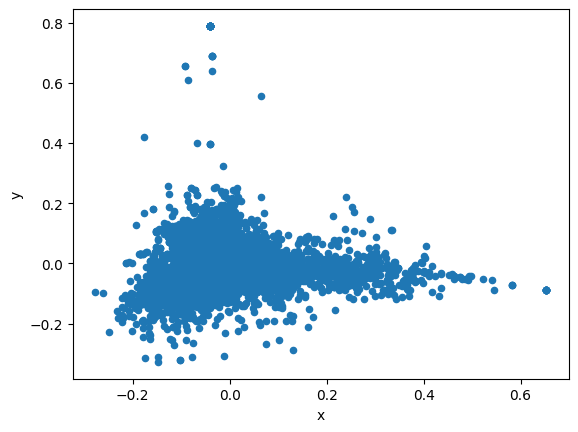

In [7]:
# Part 2: Plot

#########################
# Minimal PCA to 2d-plot
#########################

# Libraries
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
%matplotlib inline

# Set PCA to 2D [sklearn]
pca = PCA(n_components=2)

# Name of Vector Array (Numpy)
name_of_vector_array = tfidf_vectors

# New D2 Dataframe (PCA)
df2d = pd.DataFrame(pca.fit_transform(name_of_vector_array), columns=list('xy'))

# Plot Data Visualization (Matplotlib)
df2d.plot(kind='scatter', x='x', y='y')
plt.show()

In [ ]:
"""
https://www.manning.com/books/natural-language-processing-in-action

The inspiration for this module is the very wonderful book: NLP In Action

This code is not directly from chapter 4, but I wish it had been explained there. 
"""
 